In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data/clean_data.csv')



In [29]:
print(df.shape)

(2565, 19)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_id             2565 non-null   int64  
 1   Job Title          2565 non-null   object 
 2   Rating             2565 non-null   float64
 3   Company_id         2565 non-null   int64  
 4   Company Name       2565 non-null   object 
 5   Size               2565 non-null   object 
 6   Founded            2565 non-null   float64
 7   Type of ownership  2565 non-null   object 
 8   Industry           2565 non-null   object 
 9   Sector             2565 non-null   object 
 10  Revenue            2565 non-null   float64
 11  Easy Apply         2565 non-null   float64
 12  Min_Salary         2565 non-null   float64
 13  Max_Salary         2565 non-null   float64
 14  Avg_Salary         2565 non-null   float64
 15  State_id           2565 non-null   int64  
 16  City               2565 

In [31]:
print(df.head())

   Job_id                                         Job Title  Rating  \
0       0  Business Analyst - Clinical & Logistics Platform     3.9   
1       2                                      Data Analyst     3.6   
2       3   Information Security Analyst, Incident Response     3.6   
3       4                     Analyst - FP&A Global Revenue     3.4   
4       6                     Investment Analyst - Graduate     3.8   

   Company_id              Company Name                   Size  Founded  \
0           0  Memorial Sloan-Kettering       10000+ employees   1884.0   
1           2                   Asembia  501 to 1000 employees   2004.0   
2           3                        BD       10000+ employees   1897.0   
3           4           Rubicon Project   201 to 500 employees   2007.0   
4           6                  Swiss Re       10000+ employees   1863.0   

        Type of ownership                            Industry  \
0  Nonprofit Organization    Health Care Services & Hospi

In [32]:
print(df.isnull().sum())

Job_id               0
Job Title            0
Rating               0
Company_id           0
Company Name         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Easy Apply           0
Min_Salary           0
Max_Salary           0
Avg_Salary           0
State_id             0
City                 0
State                0
Headquarter          0
dtype: int64


In [42]:
dummies=pd.get_dummies(df[['Sector','Industry','Size', 'Type of ownership','City', 'State','Headquarter']])


In [35]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Columns: 139 entries, Revenue to Type of ownership_Unknown
dtypes: float64(1), uint8(138)
memory usage: 365.8 KB


In [38]:
dummies.head(5)

,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,...,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y=df['Avg_Salary']

In [45]:
xnumerical=df.drop(['Company Name','Sector', 'Avg_Salary', 'Job Title','Job_id', 'Company_id', 'Size', 'Type of ownership', 'Industry', 'Min_Salary', 'Max_Salary','State_id','City','State','Headquarter'], axis =1)
listnumerical=xnumerical.columns
print(listnumerical)

Index(['Rating', 'Founded', 'Revenue', 'Easy Apply'], dtype='object')


In [46]:
#Creating features
x=pd.concat([xnumerical,dummies], axis =1)
x.info

<bound method DataFrame.info of       Rating  Founded       Revenue  Easy Apply  Sector_Accounting & Legal  \
0        3.9   1884.0  3.500000e+09         0.0                          0   
1        3.6   2004.0  7.500000e+06         0.0                          0   
2        3.6   1897.0  1.000000e+10         0.0                          0   
3        3.4   2007.0  3.000000e+08         1.0                          0   
4        3.8   1863.0  1.000000e+10         0.0                          0   
...      ...      ...           ...         ...                        ...   
2560     3.3   1997.0  3.000000e+08         0.0                          0   
2561     5.0   2008.0  7.500000e+07         0.0                          0   
2562     3.1   2005.0  7.500000e+06         0.0                          0   
2563     5.0   2008.0  7.500000e+07         0.0                          0   
2564     3.5   1968.0  3.500000e+09         0.0                          0   

      Sector_Aerospace & Defens

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest,=train_test_split(x,y, test_size=0.3, random_state=10)
xtrain.head()

,Rating,Founded,Revenue,Easy Apply,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,...,Headquarter_Sweden,Headquarter_Switzerland,Headquarter_TN,Headquarter_TX,Headquarter_UT,Headquarter_United Kingdom,Headquarter_VA,Headquarter_WA,Headquarter_WI,Headquarter_WV
828,2.4,2005.0,3.750000e+07,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,3.7,2004.0,3.500000e+09,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,3.5,1994.0,3.500000e+09,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2356,4.0,1998.0,3.750000e+07,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
495,4.1,1868.0,7.500000e+06,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

listnumerical=['Rating','Founded','Revenue']

scaler=StandardScaler().fit(xtrain[listnumerical])
xtrain[listnumerical]=scaler.transform(xtrain[listnumerical])
xtest[listnumerical]=scaler.transform(xtest[listnumerical])
xtrain 

,Rating,Founded,Revenue,Easy Apply,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,...,Headquarter_Sweden,Headquarter_Switzerland,Headquarter_TN,Headquarter_TX,Headquarter_UT,Headquarter_United Kingdom,Headquarter_VA,Headquarter_WA,Headquarter_WI,Headquarter_WV
828,-2.264756,0.436590,-0.571809,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,-0.134816,0.435111,0.385679,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,-0.462499,0.420324,0.385679,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2356,0.356709,0.426239,-0.571809,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
495,0.520551,0.234012,-0.580104,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-0.954024,0.321254,-0.167383,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1180,0.848234,0.414410,-0.167383,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,-0.790182,0.216268,-0.580104,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0.029026,0.375964,-0.580104,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<bound method ElasticNet.fit of Lasso()>
Mean Squared Error: 549990850.3211297
Rating: 378.8857354868
Founded: 643.9806595403
Revenue: 118.9693676157
Easy Apply: -1796.0821606809
Sector_Accounting & Legal: -0.0
Sector_Aerospace & Defense: -0.0
Sector_Agriculture & Forestry: 0.0
Sector_Arts, Entertainment & Recreation: -11974.4399580807
Sector_Biotech & Pharmaceuticals: -1078.039422161
Sector_Business Services: -0.0
Sector_Construction, Repair & Maintenance: -0.0
Sector_Consumer Services: -0.0
Sector_Education: 0.0
Sector_Finance: -0.0
Sector_Government: 0.0
Sector_Health Care: -448.6359535681
Sector_Information Technology: 1016.5519835433
Sector_Insurance: 3335.2907572951
Sector_Manufacturing: 1918.1639893721
Sector_Media: 791.6257225515
Sector_Mining & Metals: 975.4167493551
Sector_Non-Profit: -0.0
Sector_Oil, Gas, Energy & Utilities: -5408.0878870938
Sector_Real Estate: 14203.3551613106
Sector_Restaurants, Bars & Food Services: -0.0
Sector_Retail: 0.0
Sector_Telecommunications: -128.

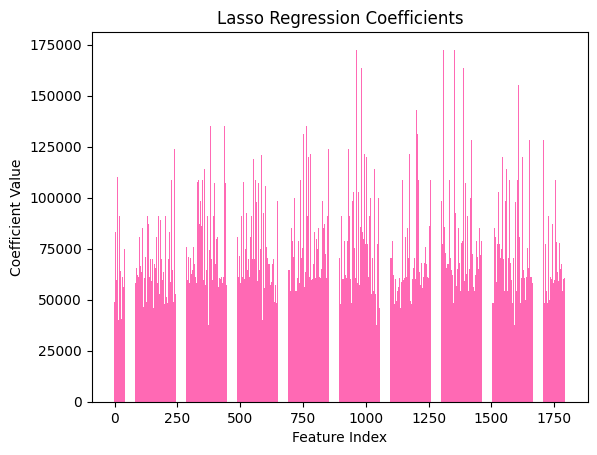

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd



# Creating a Lasso regression model
lasso = Lasso(alpha=1.0) 

# Fit the model to the training data
lasso.fit(xtrain, ytrain)

# Predict on the test set
ypred = lasso.predict(xtest)
print(lasso.fit)

#Calculate the mean squared error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

coefficients = lasso.coef_

for i, name in enumerate(xtrain.columns):
    print(name, end=": ")
    print(round(coefficients[i], 10))

# Plot the coefficients
plt.bar(range(len(xtrain)), ytrain, color= '#FF69B4')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
